In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *

In [2]:
m = 1000
d = 5
q = 2
active = fourier

ratio_train = 0.7

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    weight = np.concatenate((norm, norm), axis=-1)
    D = np.diag(1.0/weight**4)
    return D

In [3]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [4]:
y = (1+np.linalg.norm(X, axis=-1))**(-0.5)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [13]:
ns = np.arange(1, 127, 5)

# Dense features

## No ensemble

In [19]:
results_l2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense.append(res)

[0.0056295442500246574, 0.0004949965282195106, 0.0002662775736855901, 0.000272892607546319, 0.00035443442442517376, 0.00042858954544533305, 0.0006948332253822442, 0.003132987447198564, 0.0014094197491545985, 0.0011756668504725829, 0.0011312462580467836, 0.0009865012431306448, 0.0010158828744097933, 0.0009363668129709218, 0.0009680780473049856, 0.0010164074060134488, 0.0007893365210083289, 0.000852719912341484, 0.0008652994412842596, 0.0009087081453396286, 0.0008629433488352763, 0.0007364205389819499, 0.0008276100806298006, 0.000802523831131765, 0.0008280863326389349, 0.0007556913207942114]


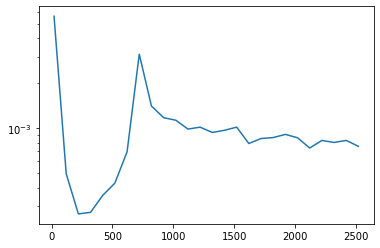

In [22]:
print([np.mean(res) for res in results_l2_dense])
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_l2_dense])

In [23]:
results_wl2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense.append(res)

[0.0037370388714449893, 0.000622288876637321, 0.00027032198752619896, 0.0002963727193224199, 0.0003732672045711761, 0.000469462566323985, 0.0007809740192781767, 0.0025912655396762353, 0.0012095480683993775, 0.001130312050292287, 0.0010805369969023103, 0.0011123891880182087, 0.0009944888663951988, 0.0009286309281604595, 0.0009069572956324481, 0.0008575888600273983, 0.0008101908594922529, 0.0008443695460258894, 0.0009583983660797072, 0.0008353162165178509, 0.0008765743218205792, 0.0009285686150710664, 0.000887846425912093, 0.0009414340112710046, 0.000888426859187484, 0.0008991686317233655]


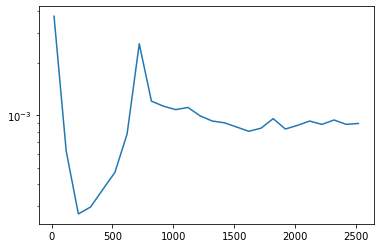

In [20]:
print([np.mean(res) for res in results_wl2_dense])
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_wl2_dense])

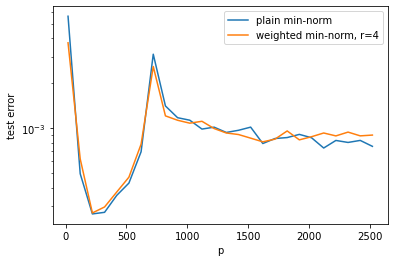

In [21]:
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_l2_dense], label="plain min-norm")
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_wl2_dense], label="weighted min-norm, r=4")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

## Ensemble

In [28]:
results_l2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense_ens.append(res)

[0.005065113488512644, 0.0027918259750919668, 0.002894268420871787, 0.002548776572533133, 0.002582221980214881, 0.0028839378651663136, 0.0026677538577516216, 0.0023831620614587937, 0.0025730015858157, 0.0024876007245238324, 0.002283959631591777, 0.002490339043394545, 0.0024097717685919997, 0.002744212115800668, 0.0025997386055990703, 0.002381307498073774, 0.002525011700284223, 0.0024559242752435436, 0.0024007322569530353, 0.002647034085666439, 0.0024434372527436395, 0.0022359730811465886, 0.0023660686134580776, 0.002401980338427195, 0.0023385107163930046, 0.002430523089240436]


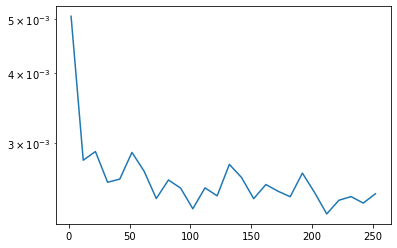

In [29]:
print([np.mean(res) for res in results_l2_dense_ens])
plt.semilogy(ns*2, [np.mean(res) for res in results_l2_dense_ens])

In [26]:
results_wl2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense_ens.append(res)

[0.008332655838581516, 0.0033622789207586657, 0.002859230548715318, 0.0035343767751153305, 0.0029689421842048155, 0.0023779504886525015, 0.0028710756559550796, 0.0026845621015321236, 0.0025011294018615327, 0.0024007544514850127, 0.0024674794074579826, 0.002458250866641003, 0.002534440601961623, 0.002109476630640388, 0.0024308170764366643, 0.0024020482547559762, 0.0024981527736284244, 0.0023897845501570135, 0.002418830724899976, 0.0023196057842096002, 0.0023559098724936613, 0.00237431263666039, 0.00256116823897064, 0.002347710274083135, 0.00249660564805625, 0.002367401115005665]


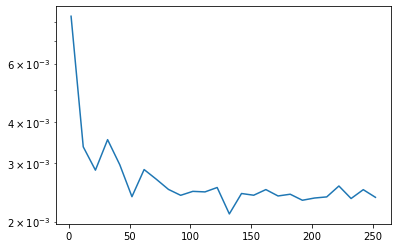

In [27]:
print([np.mean(res) for res in results_wl2_dense_ens])
plt.semilogy(ns*2, [np.mean(res) for res in results_wl2_dense_ens])

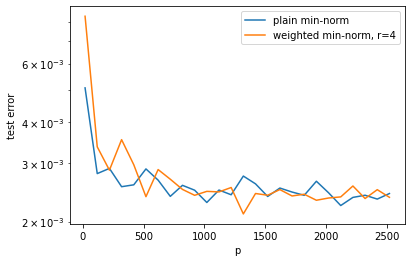

In [30]:
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_l2_dense_ens], label="plain min-norm")
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_wl2_dense_ens], label="weighted min-norm, r=4")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

# Sparse features

## No ensemble

In [41]:
results_l2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse.append(res)

[0.001558696548337697, 0.0002782924896805055, 0.00026815996203681904, 0.0003147000194561533, 0.0004127253752727133, 0.0006343585530023322, 0.00101656257908293, 0.0022825953093207636, 0.003632250290150427, 0.004333163913333484, 0.0037645835521630195, 0.003979607525531682, 0.0035460250579525897, 0.0034729250499353124, 0.003193294878047656, 0.0030983853423497878, 0.003564301242857941, 0.003540684730228591, 0.002972173068267934, 0.003402280877620676, 0.003231309552788991, 0.0034969751119983163, 0.0033260040844471524, 0.0031678396717369646, 0.003037972177524838, 0.0029135994190821247]


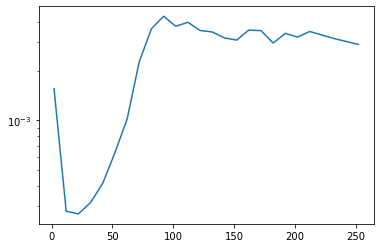

In [42]:
print([np.mean(res) for res in results_l2_sparse])
plt.semilogy(ns*2, [np.mean(res) for res in results_l2_sparse])

In [43]:
results_wl2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse.append(res)

[0.0015637013117380811, 0.00038121560235329963, 0.0002689680458595735, 0.0002899029800283667, 0.0002881830640344922, 0.0002830913105095636, 0.0002785477909443384, 0.0002932996792543465, 0.0003113749531876857, 0.0002708122739494002, 0.00040016865953570086, 0.0002796967082024884, 0.00026291428819009505, 0.0002779093119773995, 0.00026227334542606166, 0.0006464549809046315, 0.00027391026891950107, 0.0002659384676344612, 0.00030368026876815386, 0.00045248384923731247, 0.0008635963073249057, 0.00034861346983703175, 0.00026475292067457666, 0.0006205737300406377, 0.0002667669365299465, 0.0002675820022486873]


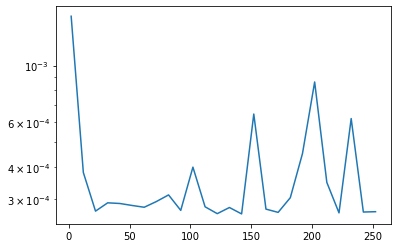

In [44]:
print([np.mean(res) for res in results_wl2_sparse])
plt.semilogy(ns*2, [np.mean(res) for res in results_wl2_sparse])

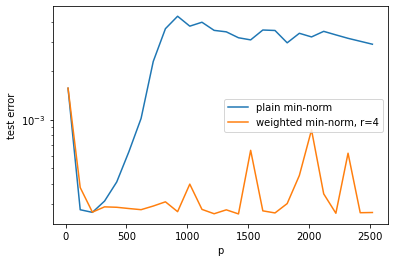

In [45]:
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_l2_sparse], label="plain min-norm")
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_wl2_sparse], label="weighted min-norm, r=4")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

## Ensemble

In [36]:
results_l2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse_ens.append(res)

[0.0013947506102617814, 0.0010567563580309012, 0.0009711648950092978, 0.0008899831223110503, 0.0009033322734453151, 0.0008742086415815855, 0.0008958761773329403, 0.0009272287323201806, 0.0009059481755336466, 0.000881058261270367, 0.0008771030058488099, 0.0008690130793263531, 0.0008774302836972685, 0.0008510984125759177, 0.0008813557472765252, 0.0008694898140971265, 0.000873237200377696, 0.0008663437075331646, 0.0008597310074559999, 0.0008889855169571476, 0.0008584637234729424, 0.0008669552371566427, 0.0008582396088894153, 0.0008579898065606823, 0.00085559521429251, 0.0008504996558695565]


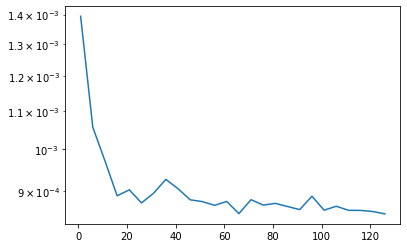

In [37]:
print([np.mean(res) for res in results_l2_sparse_ens])
plt.semilogy(ns, [np.mean(res) for res in results_l2_sparse_ens])

In [38]:
results_wl2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse_ens.append(res)

[0.0013845931884259863, 0.000992956988713788, 0.0009501759153140577, 0.000911407258676351, 0.0008780086984705234, 0.0008843296038205448, 0.000892258463783226, 0.0008570874193284358, 0.0008687416562469463, 0.000902038415208276, 0.0008671521744761356, 0.0009000442246899383, 0.0008957032508346878, 0.0008895046220437992, 0.0008589959332785523, 0.0008603849851547679, 0.0008721257187101295, 0.0008703686050411409, 0.0008528364850586362, 0.0008654636469271941, 0.0008847946585632628, 0.0008595367593754157, 0.000865297785734211, 0.0008705846732144815, 0.0008527552800564224, 0.0008636754605845813]


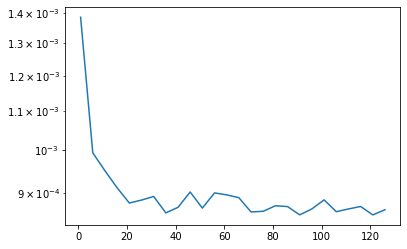

In [39]:
print([np.mean(res) for res in results_wl2_sparse_ens])
plt.semilogy(ns, [np.mean(res) for res in results_wl2_sparse_ens])

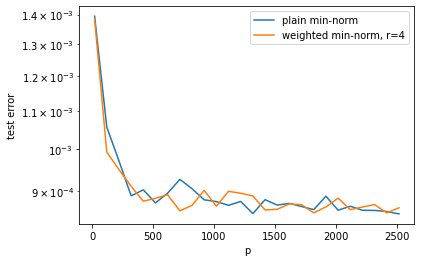

In [40]:
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_l2_sparse_ens], label="plain min-norm")
plt.semilogy(ns*2*comb(d, q), [np.mean(res) for res in results_wl2_sparse_ens], label="weighted min-norm, r=4")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()